In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.Points import PlayerPoints, PlayerServes
from utils.Tools import ResumePointsStats,ResumeServeStats, ReturnTerrain
import numpy as np
import csv

In [2]:
pd.options.display.max_columns = None

# Tratamento

In [3]:
matches = pd.read_csv('charting-m-matches.csv', encoding='unicode_escape',quoting=csv.QUOTE_NONE)

In [4]:
H = ['Hard', 'Hard Indoor',
       'Hard ', 'Indoor Hard', 'Hard (indoor)',
       'Hard Court', 'Hard (outdoor)']

C = ['Clay', 'Clay ','Indoor Clay']

In [5]:
# Tratando erros/ agrupando as superficies
matches = matches.dropna(subset=['Surface'])

matches.loc[(matches['Surface'].isin(C)), ['Surface']] = 'Clay'
matches.loc[(matches['Surface'].isin(H)), ['Surface']] = 'Hard'
matches = matches[matches['Surface'] != 'Carpet']

matches['Surface'].unique()

array(['Hard', 'Clay', 'Grass', 'Indoor'], dtype=object)

In [6]:
# Filtrando os jogos de cada jogador

Federer_Matches = matches[(matches['Player 1'] == 'Roger Federer') | (matches['Player 2'] == 'Roger Federer')]
Nadal_Matches = matches[(matches['Player 1'] == 'Rafael Nadal') | (matches['Player 2'] == 'Rafael Nadal')]
Djokovic_Matches = matches[(matches['Player 1'] == 'Novak Djokovic') | (matches['Player 2'] == 'Novak Djokovic')]

In [7]:
# Pegando todos os Ids dos jogos de cada jogador

Nadal_Id = Nadal_Matches['match_id'].unique()
Djokovic_Id = Djokovic_Matches['match_id'].unique()
Federer_Id = Federer_Matches['match_id'].unique()

In [8]:
FedererAux = Federer_Matches[['match_id','Player 1', 'Player 2','Surface']]
NadalAux = Nadal_Matches[['match_id','Player 1', 'Player 2','Surface']]
DjokovicAux = Djokovic_Matches[['match_id','Player 1', 'Player 2','Surface']]

In [9]:
#Carregando datasets de pontos

points2010 = pd.read_csv('charting-m-points-2010s.csv', encoding='unicode_escape',quoting=csv.QUOTE_NONE, low_memory=False)
points2020 = pd.read_csv('charting-m-points-2020s.csv', encoding='unicode_escape',quoting=csv.QUOTE_NONE,  low_memory=False)
points_to_2009 = pd.read_csv('charting-m-points-to-2009.csv', encoding='unicode_escape',quoting=csv.QUOTE_NONE,  low_memory=False)

In [10]:
#Juntando todos os pontos em um só dataset

Points = pd.concat([points_to_2009,points2010,points2020],axis=0).reset_index(drop=True)

# Consertando erros de input

Points['rallyCount'] = pd.to_numeric(Points['rallyCount'], errors='coerce')
Points = Points.dropna(subset=['rallyCount'])
Points['rallyCount'] = Points['rallyCount'].astype(int)

In [11]:
#Para cada jogador, retorna todos os pontos disputados em cada um de seus jogos

Federer_Games_Points = pd.merge(Points,FedererAux, on='match_id')
Nadal_Games_Points = pd.merge(Points,NadalAux, on='match_id')
Djokovic_Games_Points = pd.merge(Points,DjokovicAux, on='match_id')

In [12]:
# Divide os pontos  em vencidos/perdidos por cada jogador

Federer_Points_Won, Federer_Points_Lost = PlayerPoints('Roger Federer', Federer_Games_Points, Federer_Id)
Nadal_Points_Won, Nadal_Points_Lost = PlayerPoints('Rafael Nadal', Nadal_Games_Points, Nadal_Id)
Djokovic_Points_Won, Djokovic_Points_Lost = PlayerPoints('Novak Djokovic', Djokovic_Games_Points, Djokovic_Id)

In [13]:
# Divide os pontos em saque/receives para cada jogador

Federer_Serves, Federer_Receives = PlayerServes('Roger Federer', Federer_Games_Points, Federer_Id)
Nadal_Serves, Nadal_Receives = PlayerServes('Rafael Nadal', Nadal_Games_Points, Nadal_Id)
Djokovic_Serves, Djokovic_Receives = PlayerServes('Novak Djokovic', Djokovic_Games_Points, Djokovic_Id)

In [14]:
# Retorna os pontos vencidos nos quais o jogadore estavam no saque

Federer_Serve_Points = Federer_Serves[Federer_Serves['Svr'] == Federer_Serves['PtWinner']]
Nadal_Serve_Points = Nadal_Serves[Nadal_Serves['Svr'] == Nadal_Serves['PtWinner']]
Djokovic_Serve_Points = Djokovic_Serves[Djokovic_Serves['Svr'] == Djokovic_Serves['PtWinner']]

In [15]:
# Retorna os pontos vencidos nos quais o jogador estava recebendo
Federer_Receive_Points = Federer_Receives[Federer_Receives['Ret'] == Federer_Receives['PtWinner']]
Nadal_Receive_Points = Nadal_Receives[Nadal_Receives['Ret'] == Nadal_Receives['PtWinner']]
Djokovic_Receive_Points = Djokovic_Receives[Djokovic_Receives['Ret'] == Djokovic_Receives['PtWinner']]

In [16]:
Federer_Serves['isAce'].value_counts()
Federer_Serves['isDouble'].value_counts()
Federer_Serves['isUnret'].value_counts()

isUnret
False    47722
True       435
Name: count, dtype: int64

In [17]:
Hard, Clay, Grass = ReturnTerrain(Federer_Games_Points)

# Visualização

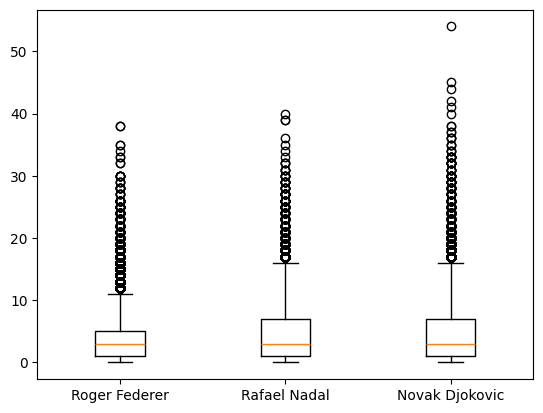

In [18]:

boxPoints = [Federer_Points_Won['rallyCount'],Nadal_Points_Won['rallyCount'], Djokovic_Points_Won['rallyCount']]

fig, ax = plt.subplots()
ax.boxplot(boxPoints)
ax.set_xticklabels(['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'])


plt.show()

In [19]:
Federer_Games_Points.columns

Index(['match_id', 'Pt', 'Set1', 'Set2', 'Gm1', 'Gm2', 'Pts', 'Gm#', 'TbSet',
       'TB?', 'TBpt', 'Svr', 'Ret', 'Serving', '1st', '2nd', 'Notes', '1stSV',
       '2ndSV', '1stIn', '2ndIn', 'isAce', 'isUnret', 'isRallyWinner',
       'isForced', 'isUnforced', 'isDouble', 'PtWinner', 'isSvrWinner',
       'rallyCount', 'Player 1', 'Player 2', 'Surface'],
      dtype='object')

In [20]:
PtDecision = ['isAce', 'isUnret', 'isRallyWinner',
       'isForced', 'isUnforced', 'isDouble']

SvrStats = ['1stIn', '2ndIn','isDouble']

In [21]:
FedererStats = ResumePointsStats(Federer_Points_Won,PtDecision)
DjokovicStats = ResumePointsStats(Djokovic_Points_Won,PtDecision)
NadalStats = ResumePointsStats(Nadal_Points_Won,PtDecision)

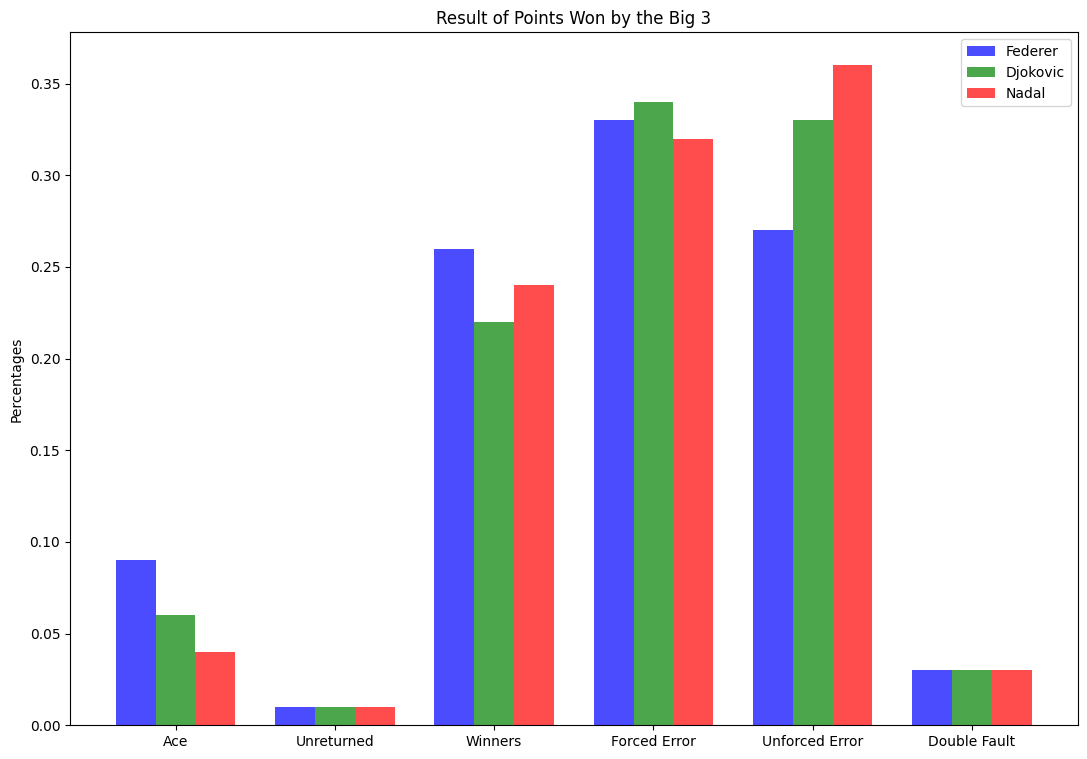

In [24]:
PtCodes = ['Ace', 'Unreturned', 'Winners','Forced Error', 'Unforced Error', 'Double Fault']

barWidth = 0.25
br1 = np.arange(len(FedererStats)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2]

plt.subplots(figsize =(13, 9))
plt.bar(br1, FedererStats, color= 'blue', alpha = 0.7,
        width = barWidth)
plt.bar(br2, DjokovicStats, color= 'green', alpha = 0.7,
        width = barWidth)
plt.bar(br3, NadalStats, color= 'red', alpha = 0.7,
        width = barWidth)

plt.xticks([r + barWidth for r in range(len(FedererStats))], 
        PtCodes)

plt.ylabel("Percentages")
plt.title("Result of Points Won by the Big 3")
plt.legend(['Federer','Djokovic','Nadal'])
plt.show()
